# 병합군집
* 병합 군집은 새로운 데이터 포인트에 대해 예측 못한다.
* 기존의 데이터 셋에서의 군집 분류용으로 사용된다.

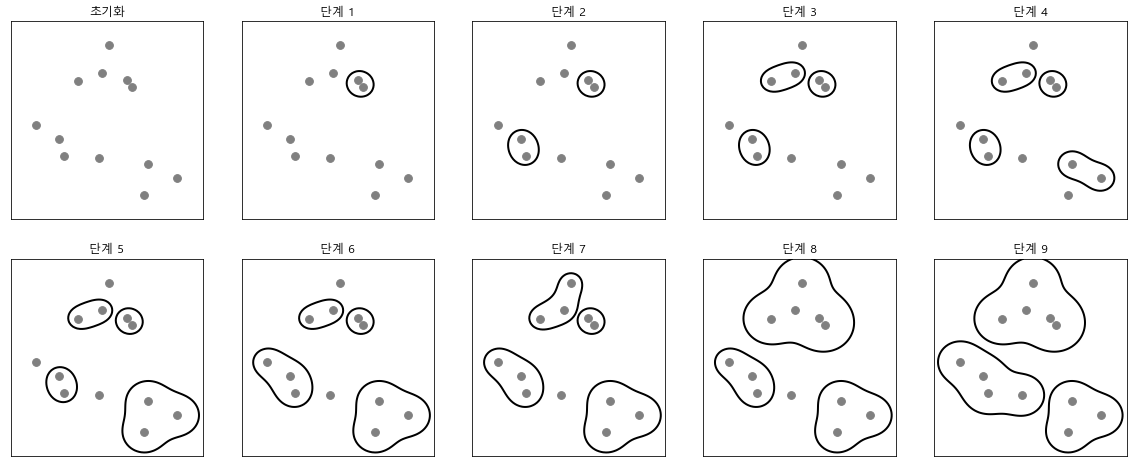

In [6]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import warnings
warnings.filterwarnings(action = 'ignore')
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, '특성 1')

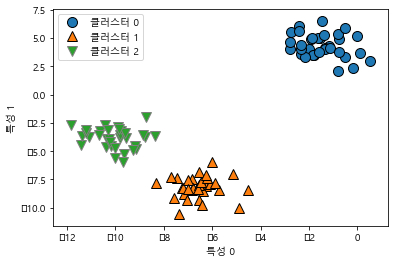

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import mglearn
import matplotlib.pyplot as plt
X, y = make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)# 새로운 데이터에 대해 예측 하지 못해 predict 메서드가 없다.

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc ='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

* scikit-learn의 병합 군집 모델을 사용하려면 찾을 클러스터의 개수를 지정해야하지만, 
* 병합군집이 적절한 개수를 선택하는데 도움되기도 한다. 

## 계층적 군집과 덴드로그램

* 병합 군집은 계층적 군집을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스에서 시작하며, 마지막 클러스터 까지 이동한다.
* 각 중간단계는 데이터에 대한 각기 다른 개수의 클러스터를 생성하는데, 이는 가능한 모든 클러스터를 연결해보는데 도움이 된다. 아래의 그림은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여준다.

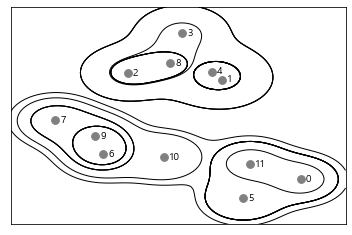

In [8]:
mglearn.plots.plot_agglomerative()

* 위 그래프는 특성이 셋이상인 데이터셋에는 사용 될 수 없으나, 각 계층 군집을 시각화하
  덴드로그램으로 다차원 데이터셋을 처리할 수 있다. 

### -덴드로그램

Text(120.0, 4, '클러스터 : 3개')

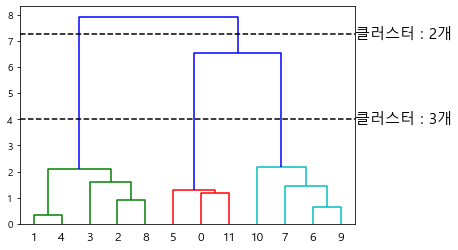

In [11]:
from scipy.cluster.hierarchy import dendrogram, ward
X,y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25], '--', c = 'k')
ax.plot(bounds, [4,4], '--', c = 'k')
ax.text(bounds[1], 7.25, '클러스터 : 2개', va = 'center', fontdict={'size':15})
ax.text(bounds[1], 4, '클러스터 : 3개', va = 'center', fontdict={'size':15})

* 하지만 병합 군집은 two_moons 같이 복잡한 형상의 데이터셋은 구분하지 못한다. 

# DBSCAN
* DBSCAN은 특정 공간 내에 데이터 밀도차이를 기반 알고리즘으로 하고 있어, 복잡한 기하학적인 분포도를 가진 데이터 셋에 대해서도 군집화를 잘수행한다.
* DBSCAN은 알고리즘이 데이터 밀도차이를 자동 감지하여 생성해, 사용자가 군집 개수를 지정할 수 없다->개꿀

* 하지만 데이터의 밀도가 자주 변하거나 모든데이터의 밀도가 크게 변하지 않으면 군집화성능이 떨어진다. 마찬가지로 피처가 많아도 그렇다

### DBSCAN 의 주요 파라미터 
* epsilon 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* 최소 데이터 개수(min points) : 개 별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 갯수


### -> 입실론 주변 영역 내에 포함되는 최소 데이터의 개수를 충족시키는가에 따라 데이터 포인트를 다음과 같이 정의
* 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심포인트라 한다.
* 이웃 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃포인트로 가지고 있는 데이터를 경계 포인트라 한다.
* 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터를 잡음 포인트라고 한다. 

### scikit-learn DBSCAN 파라미터
* eps : 입실론 주변 영역의 반경을 의미
* min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터를 포함한다.

In [12]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
cluster = dbscan.fit_predict(X)
print('클러스터 레이블 :\n', cluster)

클러스터 레이블 :
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


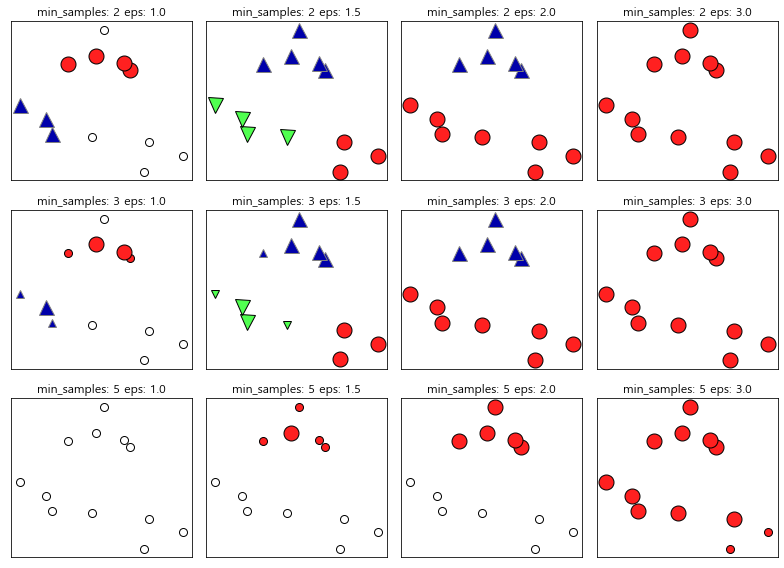

In [13]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

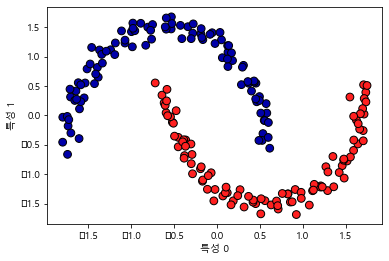

In [19]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

dbscan = DBSCAN()
cluster = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c = cluster, cmap = mglearn.cm2, s = 60,
           edgecolors = 'black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')